In [2]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.7.0
2.7.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


/var/folders/3t/bh3b870n50l8_xwgnc5hdq900000gn/T/ipykernel_72281/357239312.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
/var/folders/3t/bh3b870n50l8_xwgnc5hdq900000gn/T/ipykernel_72281/357239312.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Zad.
Zróbmy szybki preprocesing

In [5]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class


In [6]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()


Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4200      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


2022-06-01 21:12:26.709757: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-01 21:12:26.709854: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

# Zad
nauczmy model z EarlyStopping

Musimy podać:
* miarę, która ma zostać użyta do zatrzymania modelu
* jak długo ma model ma czekać na otrzymanie lepszego parametru zanim się zatrzyma


In [9]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[early_stopping])

Epoch 1/100
943/943 [==============================] - 7s 7ms/step - loss: 0.3959 - accuracy: 0.8091 - val_loss: 0.3863 - val_accuracy: 0.8113
Epoch 2/100
943/943 [==============================] - 7s 7ms/step - loss: 0.3822 - accuracy: 0.8118 - val_loss: 0.3740 - val_accuracy: 0.8106
Epoch 3/100
943/943 [==============================] - 7s 7ms/step - loss: 0.3785 - accuracy: 0.8092 - val_loss: 0.3732 - val_accuracy: 0.8128
Epoch 4/100
943/943 [==============================] - 7s 7ms/step - loss: 0.3762 - accuracy: 0.8118 - val_loss: 0.3717 - val_accuracy: 0.8157
Epoch 5/100
943/943 [==============================] - 7s 7ms/step - loss: 0.3744 - accuracy: 0.8110 - val_loss: 0.3697 - val_accuracy: 0.8128
Epoch 6/100
943/943 [==============================] - 6s 7ms/step - loss: 0.3718 - accuracy: 0.8133 - val_loss: 0.3686 - val_accuracy: 0.8165
Epoch 7/100
943/943 [==============================] - 6s 7ms/step - loss: 0.3707 - accuracy: 0.8134 - val_loss: 0.3670 - val_accuracy: 0.8191

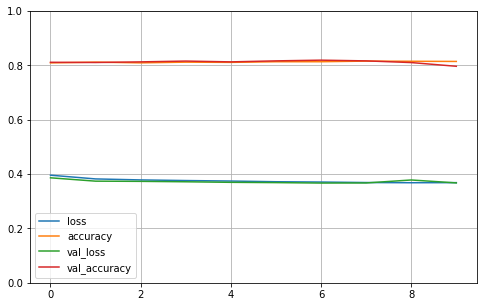

In [10]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [11]:
model.evaluate(X_test,y_test)

471/471 [==============================] - 2s 3ms/step - loss: 0.3676 - accuracy: 0.7966


[0.3675695061683655, 0.7966135740280151]

In [13]:
from sklearn import  metrics
metrics.accuracy_score(y_true= y_test, y_pred= (model.predict(X_test) > 0.5).astype("int32") )

2022-06-01 21:15:41.502337: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


0.796613545816733

# Zad.
Na poniższych danych naucz

* model bez EarlyStopping z 1000 epok
* model z wykorzystaniem EarlyStopping 
    dobierz paametr
    ```python
    patience=
    ```

Zwizualizuj wyniki:

* porównaj krzywe uczenia
* narysuj granice decyzyjne (dane są w 2D)




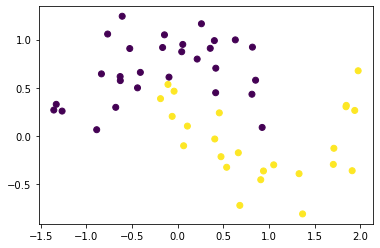

In [26]:
from sklearn.datasets import make_moons
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=5)
# split into train and test
# n_train = 30
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=2)

n_train=53
X_train, X_test = X[:n_train, :], X[n_train:, :]
y_train, y_test = y[:n_train], y[n_train:]

plt.scatter(X_train[:,0],X_train[:,1], c=y_train)
plt.show()

In [29]:
model1 = Sequential()
model1.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model1.add(Dense(50,activation="sigmoid"))
model1.add(Dense(10,activation="sigmoid"))
model1.add(Dense(1,activation="sigmoid"))
model1.summary()
model1.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 100)               300       
                                                                 
 dense_20 (Dense)            (None, 50)                5050      
                                                                 
 dense_21 (Dense)            (None, 10)                510       
                                                                 
 dense_22 (Dense)            (None, 1)                 11        
                                                                 
Total params: 5,871
Trainable params: 5,871
Non-trainable params: 0
_________________________________________________________________


In [31]:
history1 = model1.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=1000)

Epoch 1/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.0057 - accuracy: 0.4062

2022-06-01 21:19:53.464641: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-06-01 21:19:53.640583: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 136ms/step - loss: 0.9400 - accuracy: 0.4528 - val_loss: 0.7919 - val_accuracy: 0.5532
Epoch 2/1000
2/2 [==============================] - 0s 28ms/step - loss: 0.9006 - accuracy: 0.4528 - val_loss: 0.7685 - val_accuracy: 0.5532
Epoch 3/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.8648 - accuracy: 0.4528 - val_loss: 0.7477 - val_accuracy: 0.5532
Epoch 4/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.8351 - accuracy: 0.4528 - val_loss: 0.7299 - val_accuracy: 0.5532
Epoch 5/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.8056 - accuracy: 0.4528 - val_loss: 0.7154 - val_accuracy: 0.5532
Epoch 6/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.7857 - accuracy: 0.4528 - val_loss: 0.7041 - val_accuracy: 0.5532
Epoch 7/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.7619 - accuracy: 0.4528 - val_loss: 0.6959 - val_accuracy: 0.5532
Epoch 8/1000
2/2 [=======

Epoch 59/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.6689 - accuracy: 0.5472 - val_loss: 0.6843 - val_accuracy: 0.4468
Epoch 60/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.6680 - accuracy: 0.5472 - val_loss: 0.6832 - val_accuracy: 0.4468
Epoch 61/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.6674 - accuracy: 0.5472 - val_loss: 0.6821 - val_accuracy: 0.4468
Epoch 62/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.6668 - accuracy: 0.5472 - val_loss: 0.6810 - val_accuracy: 0.4681
Epoch 63/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.6658 - accuracy: 0.5660 - val_loss: 0.6803 - val_accuracy: 0.4894
Epoch 64/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.6650 - accuracy: 0.5660 - val_loss: 0.6795 - val_accuracy: 0.5319
Epoch 65/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.6642 - accuracy: 0.5849 - val_loss: 0.6787 - val_accuracy: 0.5532
Epoch 

2/2 [==============================] - 0s 24ms/step - loss: 0.3816 - accuracy: 0.8491 - val_loss: 0.4978 - val_accuracy: 0.7660
Epoch 174/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.3798 - accuracy: 0.8491 - val_loss: 0.4973 - val_accuracy: 0.7660
Epoch 175/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.3787 - accuracy: 0.8491 - val_loss: 0.4962 - val_accuracy: 0.7660
Epoch 176/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.3774 - accuracy: 0.8491 - val_loss: 0.4955 - val_accuracy: 0.7660
Epoch 177/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.3753 - accuracy: 0.8491 - val_loss: 0.4962 - val_accuracy: 0.7660
Epoch 178/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.3744 - accuracy: 0.8491 - val_loss: 0.4962 - val_accuracy: 0.7660
Epoch 179/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.3728 - accuracy: 0.8679 - val_loss: 0.4969 - val_accuracy: 0.7660
Epoch 180/1000

2/2 [==============================] - 0s 23ms/step - loss: 0.2933 - accuracy: 0.9057 - val_loss: 0.5166 - val_accuracy: 0.7872
Epoch 288/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.2933 - accuracy: 0.9057 - val_loss: 0.5181 - val_accuracy: 0.7872
Epoch 289/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.2929 - accuracy: 0.9057 - val_loss: 0.5177 - val_accuracy: 0.7872
Epoch 290/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.2925 - accuracy: 0.9057 - val_loss: 0.5156 - val_accuracy: 0.7872
Epoch 291/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.2928 - accuracy: 0.9057 - val_loss: 0.5140 - val_accuracy: 0.7872
Epoch 292/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.2926 - accuracy: 0.8868 - val_loss: 0.5170 - val_accuracy: 0.7660
Epoch 293/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.2918 - accuracy: 0.9057 - val_loss: 0.5170 - val_accuracy: 0.7660
Epoch 294/1000

2/2 [==============================] - 0s 26ms/step - loss: 0.2798 - accuracy: 0.9057 - val_loss: 0.5611 - val_accuracy: 0.7660
Epoch 402/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.2802 - accuracy: 0.9057 - val_loss: 0.5553 - val_accuracy: 0.7660
Epoch 403/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.2793 - accuracy: 0.9057 - val_loss: 0.5516 - val_accuracy: 0.7660
Epoch 404/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.2784 - accuracy: 0.9057 - val_loss: 0.5502 - val_accuracy: 0.7660
Epoch 405/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.2782 - accuracy: 0.9057 - val_loss: 0.5490 - val_accuracy: 0.7660
Epoch 406/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.2781 - accuracy: 0.9057 - val_loss: 0.5473 - val_accuracy: 0.7660
Epoch 407/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.2779 - accuracy: 0.9057 - val_loss: 0.5463 - val_accuracy: 0.7660
Epoch 408/1000

2/2 [==============================] - 0s 25ms/step - loss: 0.2734 - accuracy: 0.9057 - val_loss: 0.5441 - val_accuracy: 0.7660
Epoch 516/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.2715 - accuracy: 0.9057 - val_loss: 0.5436 - val_accuracy: 0.7660
Epoch 517/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.2714 - accuracy: 0.9057 - val_loss: 0.5424 - val_accuracy: 0.7660
Epoch 518/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.2716 - accuracy: 0.9057 - val_loss: 0.5405 - val_accuracy: 0.7660
Epoch 519/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.2716 - accuracy: 0.9057 - val_loss: 0.5391 - val_accuracy: 0.7660
Epoch 520/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.2715 - accuracy: 0.9057 - val_loss: 0.5400 - val_accuracy: 0.7660
Epoch 521/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.2712 - accuracy: 0.9057 - val_loss: 0.5388 - val_accuracy: 0.7660
Epoch 522/1000

2/2 [==============================] - 0s 23ms/step - loss: 0.2670 - accuracy: 0.9057 - val_loss: 0.5304 - val_accuracy: 0.7660
Epoch 630/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.2659 - accuracy: 0.9057 - val_loss: 0.5324 - val_accuracy: 0.7660
Epoch 631/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.2668 - accuracy: 0.9057 - val_loss: 0.5350 - val_accuracy: 0.7660
Epoch 632/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.2661 - accuracy: 0.9057 - val_loss: 0.5334 - val_accuracy: 0.7660
Epoch 633/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.2662 - accuracy: 0.9057 - val_loss: 0.5331 - val_accuracy: 0.7660
Epoch 634/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.2661 - accuracy: 0.9057 - val_loss: 0.5302 - val_accuracy: 0.7660
Epoch 635/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.2658 - accuracy: 0.9057 - val_loss: 0.5293 - val_accuracy: 0.7660
Epoch 636/1000

2/2 [==============================] - 0s 24ms/step - loss: 0.2629 - accuracy: 0.9057 - val_loss: 0.5208 - val_accuracy: 0.7660
Epoch 744/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.2615 - accuracy: 0.9057 - val_loss: 0.5201 - val_accuracy: 0.7660
Epoch 745/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.2615 - accuracy: 0.9057 - val_loss: 0.5171 - val_accuracy: 0.7660
Epoch 746/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.2615 - accuracy: 0.9057 - val_loss: 0.5161 - val_accuracy: 0.7660
Epoch 747/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.2618 - accuracy: 0.9057 - val_loss: 0.5156 - val_accuracy: 0.7660
Epoch 748/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.2617 - accuracy: 0.9057 - val_loss: 0.5140 - val_accuracy: 0.7660
Epoch 749/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.2613 - accuracy: 0.9057 - val_loss: 0.5156 - val_accuracy: 0.7660
Epoch 750/1000

2/2 [==============================] - 0s 25ms/step - loss: 0.2574 - accuracy: 0.9057 - val_loss: 0.5242 - val_accuracy: 0.7660
Epoch 858/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.2582 - accuracy: 0.9057 - val_loss: 0.5230 - val_accuracy: 0.7660
Epoch 859/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.2576 - accuracy: 0.9057 - val_loss: 0.5227 - val_accuracy: 0.7660
Epoch 860/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.2572 - accuracy: 0.9057 - val_loss: 0.5250 - val_accuracy: 0.7660
Epoch 861/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.2571 - accuracy: 0.9057 - val_loss: 0.5273 - val_accuracy: 0.7660
Epoch 862/1000
2/2 [==============================] - 0s 38ms/step - loss: 0.2590 - accuracy: 0.9057 - val_loss: 0.5301 - val_accuracy: 0.7447
Epoch 863/1000
2/2 [==============================] - 0s 34ms/step - loss: 0.2576 - accuracy: 0.9057 - val_loss: 0.5286 - val_accuracy: 0.7447
Epoch 864/1000

2/2 [==============================] - 0s 22ms/step - loss: 0.2540 - accuracy: 0.9057 - val_loss: 0.5170 - val_accuracy: 0.7447
Epoch 972/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.2535 - accuracy: 0.9057 - val_loss: 0.5166 - val_accuracy: 0.7447
Epoch 973/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.2535 - accuracy: 0.9057 - val_loss: 0.5166 - val_accuracy: 0.7660
Epoch 974/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.2532 - accuracy: 0.9057 - val_loss: 0.5175 - val_accuracy: 0.7660
Epoch 975/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.2531 - accuracy: 0.9057 - val_loss: 0.5174 - val_accuracy: 0.7660
Epoch 976/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.2537 - accuracy: 0.9057 - val_loss: 0.5171 - val_accuracy: 0.7660
Epoch 977/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.2531 - accuracy: 0.9057 - val_loss: 0.5197 - val_accuracy: 0.7660
Epoch 978/1000

In [32]:
from mlxtend.plotting import plot_decision_regions


In [33]:
model2 = Sequential()
model2.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model2.add(Dense(50,activation="sigmoid"))
model2.add(Dense(10,activation="sigmoid"))
model2.add(Dense(1,activation="sigmoid"))
model2.summary()
model2.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 100)               300       
                                                                 
 dense_24 (Dense)            (None, 50)                5050      
                                                                 
 dense_25 (Dense)            (None, 10)                510       
                                                                 
 dense_26 (Dense)            (None, 1)                 11        
                                                                 
Total params: 5,871
Trainable params: 5,871
Non-trainable params: 0
_________________________________________________________________


In [34]:
early_stopping = EarlyStopping(monitor='val_loss', patience=25, mode='min', verbose=1)
history2 = model2.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[early_stopping])

Epoch 1/100
1/2 [==============>...............] - ETA: 0s - loss: 1.0059 - accuracy: 0.4062

2022-06-01 21:20:26.374353: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-06-01 21:20:26.550394: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 133ms/step - loss: 0.9400 - accuracy: 0.4528 - val_loss: 0.7919 - val_accuracy: 0.5532
Epoch 2/100
2/2 [==============================] - 0s 26ms/step - loss: 0.9039 - accuracy: 0.4528 - val_loss: 0.7689 - val_accuracy: 0.5532
Epoch 3/100
2/2 [==============================] - 0s 25ms/step - loss: 0.8667 - accuracy: 0.4528 - val_loss: 0.7486 - val_accuracy: 0.5532
Epoch 4/100
2/2 [==============================] - 0s 25ms/step - loss: 0.8355 - accuracy: 0.4528 - val_loss: 0.7309 - val_accuracy: 0.5532
Epoch 5/100
2/2 [==============================] - 0s 23ms/step - loss: 0.8073 - accuracy: 0.4528 - val_loss: 0.7163 - val_accuracy: 0.5532
Epoch 6/100
2/2 [==============================] - 0s 23ms/step - loss: 0.7814 - accuracy: 0.4528 - val_loss: 0.7047 - val_accuracy: 0.5532
Epoch 7/100
2/2 [==============================] - 0s 23ms/step - loss: 0.7593 - accuracy: 0.4528 - val_loss: 0.6960 - val_accuracy: 0.5532
Epoch 8/100
2/2 [==============

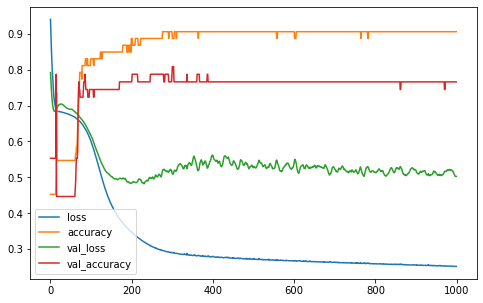

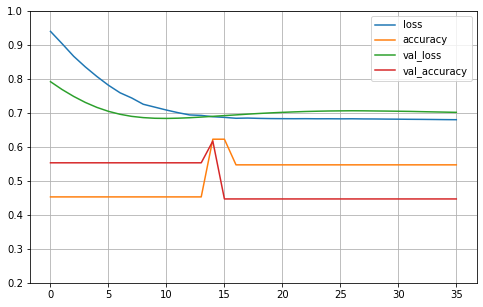

In [35]:
pd.DataFrame(history1.history).plot(figsize=(8, 5))
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0.2, 1)
plt.show()

In [36]:
from mlxtend.plotting import plot_decision_regions


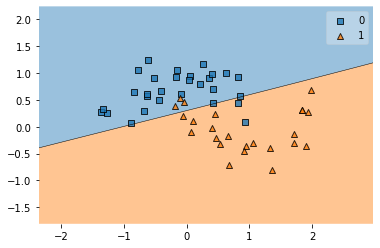

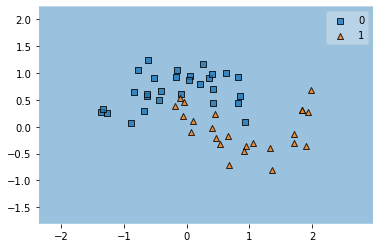

In [39]:
plot_decision_regions(X_train, y_train, clf=model1)
plt.show()
plot_decision_regions(X_train, y_train, clf=model2)
plt.show()